In [2]:
import numpy as np

def str_to_matrix(state):
    k = 0;
    mat = np.zeros((3, 3), dtype=np.int32)
    for i in range(3):
        for j in range(3):
            mat[i][j] = state[k]
            k += 1
    return mat

def matrix_to_str(mat):
    s = ""
    for t in mat.reshape(9,):
        s += (str)(t)
    return s

def get_zero_index(state):
    ind = 0
    for ch in state:
        if(ch=='0'):
            return ind
        ind += 1
        
""" TESTING """      
# org_state = '852031764'
# print(f"original state = {org_state}")
# index = get_zero_index(state)
# print(f"index of zero = {index}")
# mat = str_to_matrix(state)
# print(mat)
# # moving 0 upwards
# mat[1][0], mat[0][0] = mat[0][0], mat[1][0],
# print("After moving 0 up")
# print(mat)
# new_state = matrix_to_str(mat)
# print(f"new state = {new_state}")

' TESTING '

In [3]:
# move '0' in possible directions 
def next_states(state):

    # neighbour configurations
    neighbours = []

    # create matrix
    mat = str_to_matrix(state)

    # find index of '0'
    index = get_zero_index(state)
    
    # row and col index of '0'
    i = (int)(index / 3) # row
    j = index % 3; # col

    # move up if possible
    if(i!=0):
        temp_mat = np.copy(mat)
        temp_mat[i][j] = temp_mat[i-1][j]
        temp_mat[i-1][j] = 0
        state = matrix_to_str(temp_mat)
        neighbours.append(state)

    # move down if possible
    if(i!=2):
        temp_mat = np.copy(mat)
        temp_mat[i][j] = temp_mat[i+1][j]
        temp_mat[i+1][j] = 0
        state = matrix_to_str(temp_mat)
        neighbours.append(state)

    # move left if possible
    if(j!=0):
        temp_mat = np.copy(mat)
        temp_mat[i][j] = temp_mat[i][j-1]
        temp_mat[i][j-1] = 0
        state = matrix_to_str(temp_mat)
        neighbours.append(state)

    # move right if possible
    if(j!=2):
        temp_mat = np.copy(mat)
        temp_mat[i][j] = temp_mat[i][j+1]
        temp_mat[i][j+1] = 0
        state = matrix_to_str(temp_mat)
        neighbours.append(state)

    return neighbours

""" TESTING """ 
# state = '852031764' 
# next_states(state)

' TESTING '

In [4]:
# sum of manhatten distance 
def heuristic(state):
    ij = [0 for i in range(9)]
    for index, ch in enumerate(state):      
        i = (int)(index / 3) # row
        j = index % 3; # col
        ij[(int)(ch)] = ((i,j))
    
    dist_sum = 0
    for index in range(1,9):
        i = (int)(index / 3) # row
        j = index % 3; # col
        dx = abs(i - ij[index][0])
        dy = abs(j - ij[index][1])
        dist = dx + dy      
        dist_sum += dist
    
    return dist_sum

""" TESTING """
# state = "724506831"
# heuristic(state)

In [4]:
def 

' TESTING '

# Pure A* Search 
https://en.wikipedia.org/wiki/A*_search_algorithm

> Typical implementations of A* use a priority queue to perform the repeated selection of minimum (estimated) cost nodes to expand. This priority queue is known as the open set or fringe.

```javascript
function reconstruct_path(cameFrom, current)
    total_path := {current}
    while current in cameFrom.Keys:
        current := cameFrom[current]
        total_path.prepend(current)
    return total_path

// A* finds a path from start to goal.
// h is the heuristic function. h(n) estimates the cost to reach goal from node n.
function A_Star(start, goal, h)
    // The set of discovered nodes that need to be (re-)expanded.
    // Initially, only the start node is known.
    openSet := {start}

    // For node n, cameFrom[n] is the node immediately preceding it 
    // on the cheapest path from start to n currently known.
    cameFrom := an empty map

    // For node n, gScore[n] is the cost of the cheapest path from start to n currently known.
    gScore := map with default value of Infinity
    gScore[start] := 0

    // For node n, fScore[n] := gScore[n] + h(n).
    fScore := map with default value of Infinity
    fScore[start] := h(start)

    while openSet is not empty
        current := the node in openSet having the lowest fScore[] value
        if current = goal
            return reconstruct_path(cameFrom, current)

        openSet.Remove(current)
        closedSet.Add(current)
        for each neighbor of current
            if neighbor in closedSet 
                continue
            // d(current,neighbor) is the weight of the edge from current to neighbor
            // tentative_gScore is the distance from start to the neighbor through current
            tentative_gScore := gScore[current] + d(current, neighbor)
            if tentative_gScore < gScore[neighbor]
                // This path to neighbor is better than any previous one. Record it!
                cameFrom[neighbor] := current
                gScore[neighbor] := tentative_gScore
                fScore[neighbor] := gScore[neighbor] + h(neighbor)
                if neighbor not in openSet
                    openSet.add(neighbor)

    // Open set is empty but goal was never reached
    return failure
```

In [212]:
openSet = set()
openSet.add(1)
print(openSet)

{1}


In [216]:
import math

def reconstruct_path(cameFrom, current):
    total_path = [current]
    while current in cameFrom.keys():
        current = cameFrom[current]
        total_path.insert(0, current)
    return total_path

def A_Star(start, heuristic):
    # Discovered nodes that need to be (re-)expanded.
    openSet = set()
    
    # Initially, only the 'start' node is 'discovered'.
    openSet.add(start)

    # Nodes that have already been expanded
    closedSet = set()
    
    # For node 'n', cameFrom[n] is the node immediately preceding it 
    # on the cheapest path from 'start' to 'n' currently known.
    cameFrom = {}
    
    # For node 'n', gScore[n] is the cost of the cheapest path 
    # from 'start' to 'n' currently known.
    gScore = {} # map with default value of Infinity
    gScore[start] = 0

    # For node 'n', fScore[n] := gScore[n] + heuristic(n).
    fScore = {} # map with default value of Infinity
    fScore[start] = gScore[start] + heuristic(start)
    
    while(len(openSet)): # openSet is not empty
        
        # current := the node in openSet having the lowest fScore[] value
        current = min(openSet, key=lambda node: fScore[node])
        
        # Goal test
        if (current == "012345678"):
            return reconstruct_path(cameFrom, current)
        
        # Expanding 'current' node
        for neighbor in next_states(current):
            if neighbor in closedSet:
                continue
                
            # tentative_gScore is the distance 
            # from start to the neighbor through current        
            tentative_gScore = gScore[current] + 1 
            
            # If neighbour not visited previously
            # => best-path known is infinite gScore!
            if neighbor not in gScore.keys():
                gScore[neighbor] = math.inf
                
            if (tentative_gScore < gScore[neighbor]):
                # This path to neighbor is better than 
                # any previous known path one. Record it!
                cameFrom[neighbor] = current
                gScore[neighbor] = tentative_gScore
                fScore[neighbor] = gScore[neighbor] + heuristic(neighbor)
                if neighbor not in openSet:
                    openSet.add(neighbor)

        # Expantion of 'current' node complete
        openSet.remove(current)
        closedSet.add(current)

    # Open set is empty but goal was never reached
    return -1

In [217]:
A_Star("321478650", heuristic)

['321478650',
 '321478605',
 '321408675',
 '301428675',
 '031428675',
 '431028675',
 '431628075',
 '431628705',
 '431628750',
 '431620758',
 '431602758',
 '431652708',
 '431652078',
 '431052678',
 '031452678',
 '301452678',
 '310452678',
 '312450678',
 '312405678',
 '312045678',
 '012345678']

In [25]:
import networkx as nx
G = nx.Graph()

In [53]:
e = set()
count = 0
for node in path_nodes:
    for nxt in next_states(node):
        count += 1
        if (node, nxt) not in e and (nxt, node) not in e :
            e.add((node, nxt))
            
G.add_edges_from(e)
e = set(node for node in G.nodes())

t = e.difference(set(path_nodes))
e = set()
for node in t:
    for nxt in next_states(node):
        count += 1
        if (node, nxt) not in e and (nxt, node) not in e :
            e.add((node, nxt))

G.add_edges_from(e)
print(G.number_of_nodes())
print(G.number_of_edges())

75
74


In [71]:
node_color = ['b' if node in path_nodes else 'r' for node in G.nodes()]

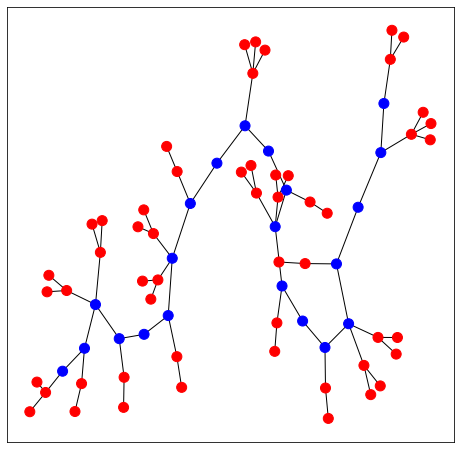

In [103]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 8))
nx.draw_networkx(G, pos=pos, with_labels=False, node_size=100,
                node_color=node_color)
plt.show()

# Modified A* Search 

In [201]:
import math

def reconstruct_path(cameFrom, current):
    total_path = [current]
    while current in cameFrom.keys():
        current = cameFrom[current]
        total_path.insert(0, current)
    return total_path

def A_Star(start):
    # The set of discovered nodes that need to be (re-)expanded.
    # Initially, only the start node is known.
    openSet = [start] # consider using priority queue

    # already expanded there nodes
    closedSet = []
    
    # For node n, cameFrom[n] is the node immediately preceding it 
    # on the cheapest path from start to n currently known.
    cameFrom = {}
    
    # For node n, gScore[n] is the cost of the cheapest path from start to n currently known.
    gScore = {} # map with default value of Infinity
    gScore[start] = 0

    # For node n, fScore[n] := gScore[n] + h(n).
    fScore = {} # map with default value of Infinity
    fScore[start] = heuristic(start)
    
    while(len(openSet) != 0): # openSet is not empty
        
        # current := the node in openSet having the lowest fScore[] value
        current = min(openSet, key=lambda o: gScore[o] + heuristic(o))
        
        if (current == "012345678"):
            return reconstruct_path(cameFrom, current)
        
        # get limited BFS depth neighbours
        neighbours = LimitedBFS(current, depth)

        # UNION of neighbours and openSet
        
        #Remove the item from the open set
        openSet.remove(current)
        #Add it to the closed set
        closedSet.append(current)
        
        for neighbor in next_states(current):
            if neighbor in closedSet:
                continue
                
            # d(current,neighbor) is the weight of the edge from current to neighbor
            # tentative_gScore := gScore[current] + d(current, neighbor)
            
            # d(x,y) = 1 for all pairs x, y in our case!
            # tentative_gScore is the distance from start to the neighbor through current        
            tentative_gScore = gScore[current] + 1 
            
            try:
                gScore_neighbor = gScore[neighbor]
            except:
                gScore_neighbor = math.inf
                
            if (tentative_gScore < gScore_neighbor):
                # This path to neighbor is better than any previous one. Record it!
                cameFrom[neighbor] = current
                gScore[neighbor] = tentative_gScore
                fScore[neighbor] = gScore[neighbor] + heuristic(neighbor)
                if neighbor not in openSet:
                    openSet.append(neighbor)

    # Open set is empty but goal was never reached
    return -1